In [79]:
from search_algorithms import *
import test
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Run test and generate raw data 

`perf` contains sample test search problems and the time taken by each algorithm to find solution. It has the following structure.

```
{
    algorithm : List of 
                {
                    start: the start
                    end: the goal node
                    node_count: total nodes inside the graph
                    runtime: the time taken by algorithm to find solution (path from start to end)
                }
}
```

In [80]:
perf = test.test_performance()

In [81]:
# perf

### Extract average run time from raw data


```
`algs` contains 
    `algorithm` : {
        `total_node_in_graph` : `average_run_time`
    }
 ```

In [82]:
algs = {}

for alg, samples in perf.items():
    perf_per_node_count = defaultdict(lambda : [0, 0])
    
    for sample in samples:
        perf_per_node_count[sample["node_count"]][0] += 1
        perf_per_node_count[sample["node_count"]][1] += sample["runtime"]
    
    for key, value in perf_per_node_count.items():        
        perf_per_node_count[key] = value[1] / value[0]
        
    algs[alg] = perf_per_node_count

In [83]:
# algs

# Performance plot

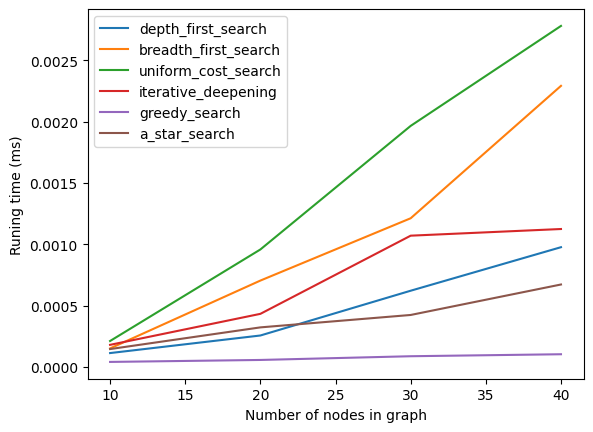

In [84]:
for k, v in algs.items():      
    plt.plot(v.keys(), v.values(), label=k.__name__)
    plt.xlabel("Number of nodes in graph")
    plt.ylabel("Runing time (ms)")
    plt.legend(loc="upper left")

We can see from the plot the following properties.

`Iterative deepening` and `Breadth first search` have almost identical time complexity exhibiting similar growth rate as number of node increase. This was expected as they both seem to explore the graph a layer at a time.


`Uniform cost search` is the most costy algorithm, although it can give us the most optimal path between nodes, it needs to expand several nodes before settling for optimal solution.


`A* search